In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [45]:
df = pd.read_csv('data.csv')

In [46]:
df.head()

,Year,Price
0,2022,52950
1,2021,50045
2,2020,48651
3,2019,35220
4,2018,31438


In [47]:
X = df['Year']
y = df['Price']

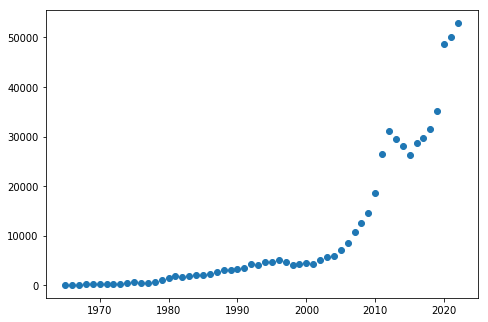

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(X,y)

In [49]:
sns.lmplot(x = 'Year',y = 'Price', data = df)

NameError: name 'sns' is not defined

In [50]:
df.describe()

,Year,Price
count,58.000000,58.000000
mean,1993.500000,10070.879310
std,16.886879,13921.378552
min,1965.000000,72.000000
25%,1979.250000,1035.250000
50%,1993.500000,4187.000000
75%,2007.750000,12075.000000
max,2022.000000,52950.000000


# Using GD

In [51]:
def initi():
    b = 1
    w = 1.9
    return b, w

In [52]:
def forward(X, b, w):
    z = b + w * X
    return z

In [53]:
def error(y,z):
    delta = z - y
    return delta

In [54]:
def update_param(b, w, z, learning_rate, delta, X):
    
    b = b - learning_rate * np.mean(delta)
    w = w - learning_rate * np.mean(delta * X)


    return b, w

In [55]:
def gradient_des(X, y, learning_rate, epochs):
    b, w = initi()
    
    for i in range(epochs):
        z = forward(X, b, w)
        delta = error(y, z)
        b, w = update_param(b, w, z, learning_rate, delta, X)
#         b = b - learning_rate * np.mean(delta)  # Update intercept
#         w = w - learning_rate * np.mean(delta * X)  # Update slope
        
        if i % 10 == 0:
            loss = np.sum(delta ** 2)
            loss = np.sqrt(loss)
            print(f"Epoch {i+1}/{epochs}, Loss: {loss}")
            
            
    return b, w


In [56]:
b,w = gradient_des(X, y, 0.1, 51)

Epoch 1/51, Loss: 115300.77475823829
Epoch 11/51, Loss: 4.774520174196229e+60
Epoch 21/51, Loss: 4.694085028450518e+116
Epoch 31/51, Loss: inf
Epoch 41/51, Loss: inf
Epoch 51/51, Loss: inf


In [57]:
print(w)
print(b)

1.1676994440819196e+286
5.857121161703935e+282


In [58]:
d = b + w * 2025

In [59]:
print("price of gold according to model: ", d)

price of gold according to model:  2.3645919599780034e+289


In [60]:
print("error is : ", mean_squared_error(X,y))

error is :  255329125.68965518


# Using SKlearn

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
X = np.array(X)
y = np.array(y)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X.reshape(-1,1),y)

LinearRegression()

In [65]:
pred = lr.predict(X.reshape(-1,1))

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
print("error is : ", mean_squared_error(X.reshape(-1,1),y))

error is :  255329125.68965518


# Simple


In [68]:
x_mean = df['Year'].mean()
y_mean = df['Price'].mean()


In [69]:
b1_numerator = 0
b1_denominator = 0
for i in range (len(df)):
    b1_numerator += (df['Year'][i] - x_mean)*(df['Price'][i]-y_mean) 
    b1_denominator += (df['Year'][i]-x_mean)*(df['Year'][i]-x_mean)


In [70]:
b1 = b1_numerator/b1_denominator
b0 = y_mean - b1*x_mean

In [71]:
print("b1 =",b1)
print("b0 =",b0)

b1 = 675.343658679135
b0 = -1336226.704266511


In [72]:
mse = 0
ans =0 
for i in range(len(df)):
    y_pred = b1*df['Year'][i] + b0
    ans += (y_pred - df['Price'][i])*(y_pred - df['Price'][i])
ans = ans/len(df)
rmse = ans**0.5
print("mse =",ans)
print("rmse =",rmse)

mse = 62644360.723755024
rmse = 7914.8190581816225


In [73]:
d = b + w * 2025

In [74]:
print("price of gold according to model: ", d)

price of gold according to model:  2.3645919599780034e+289
